<a href="https://colab.research.google.com/github/jaypatil848/Assignment-4-Simple-Linear-Regression-Model/blob/main/Assignment_4_Simple_Linear_Regression_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Q.1. Predict delivery time using sorting time
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## Load Data Set

In [2]:
df=pd.read_csv('/content/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
# Renaming Columns
data=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Visualization

In [8]:
from scipy.stats import skew
print(skew(data.delivery_time))

0.326702631656106


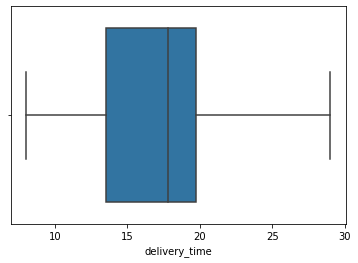

In [11]:
sns.boxplot(data['delivery_time'], orient = 'h')



*   The data for Delivery time is skewed left.
*   All the observations lies in the intervals of approximately 13 to 20
*   We can say that the median delivery time is around 18-19.










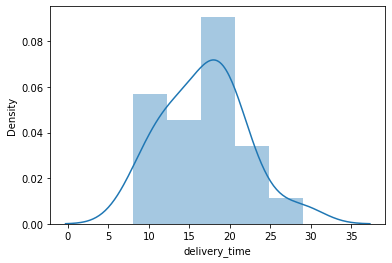

In [12]:
sns.distplot(data['delivery_time'])



*   The distribution of 'Delivery Time' data is slightly more on the left of the curve




In [13]:
print(skew(data.sorting_time))

0.043680994983108075


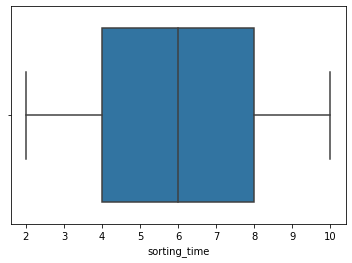

In [15]:
sns.boxplot(data['sorting_time'], orient='h')



*   The observations for Sorting Time lies nearly between 4 to 8.
*   It means the Sorting Time data is symmetric and skewed.
*   The median sorting time is approximately around 6.





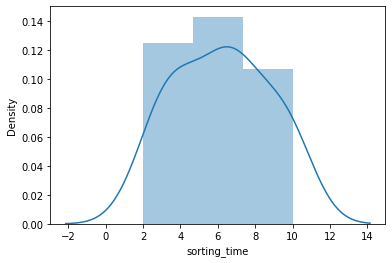

In [16]:
sns.distplot(data['sorting_time'])

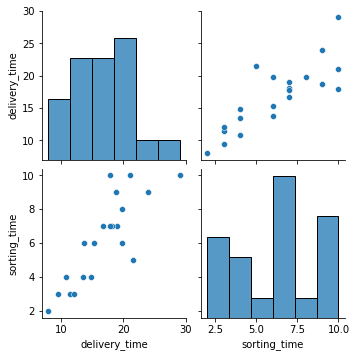

In [17]:
sns.pairplot(data)

## Data Correlation

In [19]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


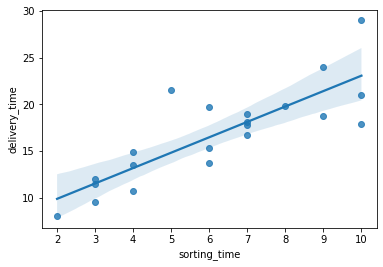

In [20]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

## Model Building

In [22]:
model1=smf.ols("delivery_time~sorting_time",data=data).fit()

In [23]:
# Finding Coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [24]:
# Finding tvalues and pvalues
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [25]:
# Finding Rsquared Values
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Prediction

In [26]:
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [27]:
# Automatic Prediction for say sorting time 6, 8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [29]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64



*  From this model we can understand that above model is the best model.




# Q.2. Salary_hike -> Build a prediction model for Salary_hike
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [35]:
dframe=pd.read_csv('/content/Salary_Data.csv')
dframe.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Feature Engineering

In [31]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [32]:
dframe.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
dframe1 = dframe.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
dframe1.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Visualization

In [37]:
print(skew(dframe1.YE))

0.3603123252525561


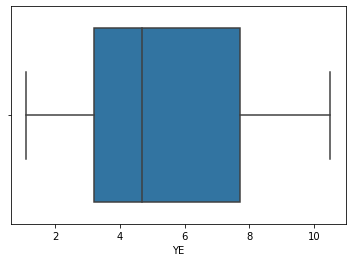

In [39]:
sns.boxplot(dframe1['YE'], orient = 'h')





*   The data for Year Experience is skewed right.
*   All the observations lies in the intervals of approximately 3 to 8
*   We can say that the median years of experience is 5.2 years.






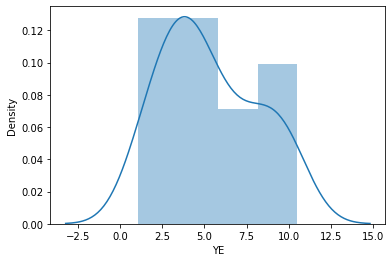

In [40]:
sns.distplot(dframe1['YE'])

 

*  The distribution of Year Experience data is slightly more on the right tail of the curve




In [41]:
print(skew(dframe1.Sal))

0.3361618825592921


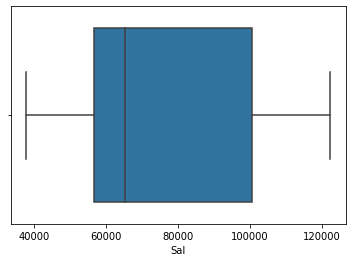

In [42]:
sns.boxplot(dframe1['Sal'], orient='h')





* The onservations for Salary lies nearly between 57000 to 110000.  
* The data is skewed towars right side.  
* The median Salary is nearly 65000.






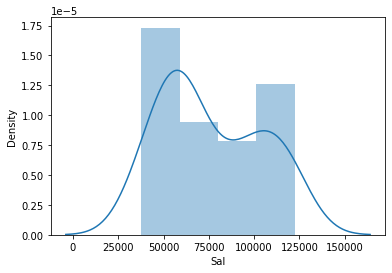

In [43]:
sns.distplot(dframe1['Sal'])

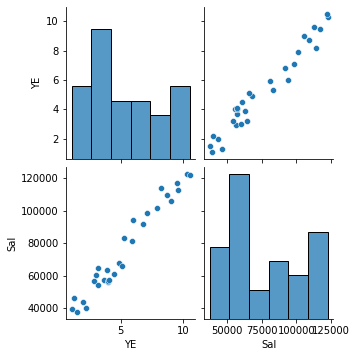

In [44]:
sns.pairplot(dframe1)

## Correlation analysis

In [46]:
dframe1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


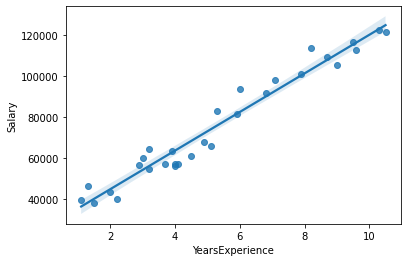

In [49]:
sns.regplot(x=dframe['YearsExperience'],y=dframe['Salary'])

## Model Building

In [52]:
model=smf.ols('Salary~YearsExperience',data=dframe).fit()

In [53]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [54]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [55]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [56]:
#model prediction
# Manual prediction for say 2 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [57]:
# Automatic Prediction for say 2 & 6Years Experience
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [58]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [59]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64



*  From above we can say that this is the best model.


